<center>

*******************************************************************************************
    
### Pose Detection in Video

##### 11 November 2024

##### Juan Ignacio Mendoza Garay  

*******************************************************************************************

</center>

##### INFORMATION:

* Tested using:

    * [MVIG-SJTU/AlphaPose](https://github.com/MVIG-SJTU/AlphaPose) :
        * scripts/demo_inference.py has to be modified to effectively load the package folders
    * Python 3.11
    * Windows 11 operating system
    * Intel 64-bit CPU
>      
* Dependencies:

    * Youtube video downloader: https://pypi.org/project/yt-dlp/
    * cython_bbox:
        1) install Desktop Development with C++ from the Visual Studio Installer
        2) type to command prompt: \
           a) set DISTUTILS_USE_SDK=1 \
           b) pip install cython_bbox  \
           NOTE: Pip was used for installation but other installers could be used.
    * Other packages might be prompted for installation.
>
* Reference:
    * https://github.com/tugstugi/dl-colab-notebooks/blob/master/notebooks/AlphaPoseV0_3_0.ipynb
>
* Instructions:

    Edit the values indicated with an arrow like this: <---  
    Comment/uncomment or change values as suggested by the comments.  
    Run the program, close your eyes and hope for the best.  

*******************************************************************************************

In [60]:
import os
from os.path import join, exists
from IPython.display import YouTubeVideo
import io
import base64
from IPython.display import HTML

***
#### Set paths and parameters:

In [84]:
AP_code_path = r"C:\Users\Trevor_Philips\Documents\Python\AlphaPose" # <--- folder of AlpHaPose code (full path)
AP_results_path = r"C:\Users\Trevor_Philips\Documents\AlphaPose_results" # <--- folder where results will be saved (full path)

# Most probably there is no need to alter the following:
yolo_pretrained_model_path = join(AP_code_path, r'detector\yolo\data\yolov3-spp.weights')
pretrained_model_path = join(AP_code_path, r'pretrained_models\fast_421_res152_256x192.pth')
pretrained_model_config_path = join(AP_code_path, r'configs\coco\resnet/256x192_res152_lr1e-3_1x-duc.yaml')

>
##### Information to process Youtube video:

In [ ]:
# Comment/uncomment:

#YT_video_ID = 'bqpRoVxH2jc' # <--- this string is at the end of the video's Youtube page URL
#lbl = 'Rammstein_Sonne_kids' # <--- name for the resulting video file
#trim_start = 0 # <--- trim start in seconds
#trim_end = 5 # <--- trim end in seconds

YT_video_ID = 'es_3F3TLJS0' # <--- this string is at the end of the video's Youtube page URL
lbl = 'Pachelbel_Str_Qt' # <--- name for the resulting video file
trim_start = 4 # <--- trim start in seconds
trim_end = 9 # <--- trim end in seconds

***
#### Get pre-trained models:

In [14]:
if not exists(yolo_pretrained_model_path):
  ! mkdir {AP_code_path}\detector\yolo\data
  ! gdown -O {yolo_pretrained_model_path} https://drive.google.com/uc?id=1D47msNOOiJKvPOXlnpyzdKA3k6E97NTC

if not exists(pretrained_model_path):  
  ! gdown -O {pretrained_model_path} https://drive.google.com/uc?id=1kfyedqyn8exjbbNmYq8XGd2EooQjPtF9

***
#### Preview Youtube video:

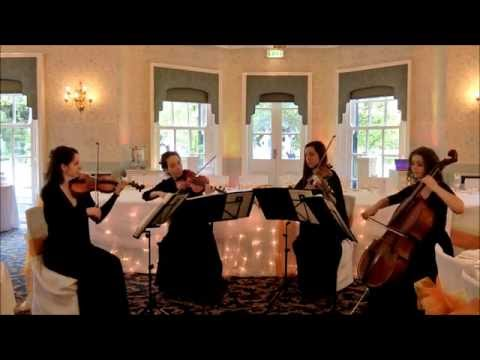

In [85]:
YouTubeVideo(YT_video_ID)

***
#### Download and trim video:

In [ ]:
# Download video:
video_in_ffn = AP_results_path + '\\video_in.mp4'
! del {video_in_ffn}
! yt-dlp -f "bestvideo[ext=mp4]" --output "{video_in_ffn}" https://www.youtube.com/watch?v={YT_video_ID} -q

In [87]:
# Trim video:
video_trimmed_ffn = AP_results_path + '\\video_trimmed.avi'
! ffmpeg -y -loglevel error -i {video_in_ffn} -vf trim={trim_start}:{trim_end} {video_trimmed_ffn}

***
#### Run AlphaPose demo:

In [ ]:
! cd {AP_code_path} && python scripts\demo_inference.py --sp --video {video_trimmed_ffn} --outdir {AP_results_path} --save_video --checkpoint {pretrained_model_path} --cfg {pretrained_model_config_path}

***
#### Visualise video with overlaid pose sticks:

In [95]:
# Encode MP4:
video_AP_ffn_ne = AP_results_path + '\\AlphaPose_video_trimmed'
video_AP_ffn_avi = video_AP_ffn_ne + '.avi'
video_AP_out_ffn_mp4 = AP_results_path + '\\' + lbl + '.mp4'
! ffmpeg -y -loglevel error -i {video_AP_ffn_avi} -vcodec libx264 {video_AP_out_ffn_mp4}

In [97]:
# Display:
width = 400
height = 300
video_encoded = base64.b64encode(io.open(video_AP_out_ffn_mp4, 'rb').read())
HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
             <source src="data:video/mp4;base64,{2}" type="video/mp4" />
             </video>'''.format(width, height, video_encoded.decode('ascii')))